In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('final_annotations.csv')

In [3]:
df.head()

,sentence,sentiment,impact,sentiments,impacts,batch,film_title
0,Good restraint on the use of adjectives.,Positive,Engagement with Film,['Positive' 'Positive' 'Positive'],['Engagement with Film' 'Not yet categorized' ...,1,Seeing the Beginning of Time
1,Enjoy seeing/tracking storms....fascinating...,Positive,Interest with Science Topic,['Positive' 'Positive' 'Positive'],['Interest with Science Topic' 'Interest with ...,1,SuperTornado: Anatomy of a Megadisaster
2,"The sound design, visuals and narration are bl...",Positive,Engagement with Film,['Positive' 'Positive' 'Positive'],['Engagement with Film' 'Engagement with Film'...,1,Seeing the Beginning of Time
3,Richard Dormer had a calming voice that made t...,Positive,Engagement with Film,['Positive' 'Positive' 'Positive'],['Engagement with Film' 'Engagement with Film'...,1,Birth of Planet Earth
4,So many never seen before images and actual pi...,Positive,Engagement with Film,['Positive' 'Positive' 'Neutral'],['Shift in Knowledge' 'Engagement with Film' '...,1,The Jupiter Enigma


In [4]:
## we dont need the sentiments, impacts, batch and film_title columns
df.drop(["sentiments", "impacts", "batch", "film_title"], axis=1, inplace=True)

In [5]:
df.shape

(1296, 3)

In [6]:
df.head()

,sentence,sentiment,impact
0,Good restraint on the use of adjectives.,Positive,Engagement with Film
1,Enjoy seeing/tracking storms....fascinating...,Positive,Interest with Science Topic
2,"The sound design, visuals and narration are bl...",Positive,Engagement with Film
3,Richard Dormer had a calming voice that made t...,Positive,Engagement with Film
4,So many never seen before images and actual pi...,Positive,Engagement with Film


In [7]:
df["sentiment"].value_counts()

Positive    696
Negative    372
Neutral     228
Name: sentiment, dtype: int64

In [189]:
## so now we have sentence, sentiment and impact

## we need to convert the sentiment to a numerical value for the model we have 3 classes
## 0 - negative
## 1 - neutral
## 2 - positive

df["sentiment"].replace({"Negative": 0, "Neutral": 1, "Positive": 2}, inplace=True)

In [190]:
df.head()

,sentence,sentiment,impact
0,Good restraint on the use of adjectives.,2,Engagement with Film
1,Enjoy seeing/tracking storms....fascinating...,2,Interest with Science Topic
2,"The sound design, visuals and narration are bl...",2,Engagement with Film
3,Richard Dormer had a calming voice that made t...,2,Engagement with Film
4,So many never seen before images and actual pi...,2,Engagement with Film


In [191]:
df["impact"].unique()

array(['Engagement with Film', 'Interest with Science Topic',
       'Impersonal Report', 'Shift in Knowledge', 'Not applicable', 'TBD'],
      dtype=object)

In [192]:
## IDK what is TBD, so I will drop it for now (I guess its to be decided)
df = df[df["impact"] != "TBD"]

In [193]:
df["impact"].value_counts()

Engagement with Film           792
Not applicable                 198
Shift in Knowledge             143
Interest with Science Topic     90
Impersonal Report               41
Name: impact, dtype: int64

In [194]:
## we need to convert the impact to a numerical value for the model we have 5 classes
## 0 - Engagement with Film
## 1 - Not applicable
## 2 - Shift in Knowledge
## 3 - Interest with Science Topic
## 4 - Impersonal Report 

df["impact"].replace({"Engagement with Film": 0, "Not applicable": 1, "Shift in Knowledge": 2, "Interest with Science Topic": 3, "Impersonal Report": 4}, inplace=True)
## for now just giving a numerical value to the impact, later we can use one hot encoding


In [195]:
df.head()

,sentence,sentiment,impact
0,Good restraint on the use of adjectives.,2,0
1,Enjoy seeing/tracking storms....fascinating...,2,3
2,"The sound design, visuals and narration are bl...",2,0
3,Richard Dormer had a calming voice that made t...,2,0
4,So many never seen before images and actual pi...,2,0


In [196]:
## using spacy to tokenize the sentences
import spacy
nlp = spacy.load('en_core_web_sm')

In [198]:
from spacy.lang.en.stop_words import STOP_WORDS
## we need to tokenize the sentences
## we will use spacy for this
## we will also remove the stopwords

def tokenize(sentence):
    tokens = nlp(sentence)
    tokens = [token.text for token in tokens]
    tokens = [token for token in tokens if token.isalpha() or token.isnumeric()]
    tokens = [token for token in tokens if token not in STOP_WORDS]
    return tokens

df["tokens"] = df["sentence"].apply(tokenize)

df["tokens"] = df["tokens"].apply(lambda x: " ".join(x))

In [199]:
df.drop("sentence", axis=1, inplace=True)

In [200]:
df.head()

from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer(tokenizer=tokenize, ngram_range=(1,1))
vectorizer.fit(df["tokens"])


X = vectorizer.transform(df["tokens"])

## we will need to use this vectorizer later for prediction on new data so we will save it 
import pickle
pickle.dump(vectorizer, open("vectorizer.pkl", "wb"))


/opt/homebrew/lib/python3.10/site-packages/sklearn/feature_extraction/text.py:524: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


In [201]:
## vocabulary
vectorizer.vocabulary_.keys().__len__()

2269

In [202]:
vectorizer.vocabulary_

{'good': 898,
 'restraint': 1691,
 'use': 2139,
 'adjectives': 62,
 'enjoy': 673,
 'seeing': 1772,
 'tracking': 2071,
 'storms': 1923,
 'fascinating': 766,
 'sound': 1863,
 'design': 525,
 'visuals': 2174,
 'narration': 1345,
 'blended': 224,
 'richard': 1707,
 'dormer': 605,
 'calming': 288,
 'voice': 2175,
 'film': 794,
 'enjoyable': 674,
 'watch': 2192,
 'seen': 1773,
 'images': 1022,
 'actual': 53,
 'pictures': 1497,
 'taken': 1988,
 'probe': 1566,
 'enjoyed': 675,
 'video': 2161,
 'felt': 783,
 'effective': 645,
 'shorter': 1806,
 'tell': 2006,
 'produced': 1572,
 'targeted': 1995,
 'high': 961,
 'school': 1754,
 'classes': 344,
 'fine': 801,
 'need': 1362,
 'simplified': 1820,
 'documentaries': 597,
 'like': 1181,
 'includes': 1043,
 'breathtaking': 257,
 'astonishingly': 146,
 'complex': 389,
 'visual': 2171,
 'simulations': 1824,
 'talks': 1993,
 'alot': 92,
 'satellites': 1739,
 'junk': 1112,
 'space': 1871,
 'interesting': 1079,
 'develop': 544,
 'spots': 1891,
 'boring': 249

In [79]:
## using sentiment as the target
y = df["sentiment"]

In [98]:
## using SMOTE to balance the dataset before splitting into train and test
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=42)
X, y = smote.fit_resample(X, y)

In [99]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [25]:
from sklearn.naive_bayes import MultinomialNB
clf = MultinomialNB()
clf.fit(X_train, y_train)

y_pred = clf.predict(X_train)

In [26]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, f1_score, precision_score, recall_score

print(classification_report(y_train, y_pred))

              precision    recall  f1-score   support

           0       0.91      0.57      0.70       530
           1       0.73      0.94      0.82       562
           2       0.89      0.94      0.91       544

    accuracy                           0.82      1636
   macro avg       0.84      0.82      0.81      1636
weighted avg       0.84      0.82      0.81      1636



In [27]:
accuracy = accuracy_score(y_train, y_pred)
precision = precision_score(y_train, y_pred, average="weighted")
recall = recall_score(y_train, y_pred, average="weighted")
f1 = f1_score(y_train, y_pred, average="weighted")

print("Accuracy: ", accuracy)
print("Precision: ", precision)
print("Recall: ", recall)
print("F1: ", f1)

Accuracy:  0.8227383863080685
Precision:  0.84110996789047
Recall:  0.8227383863080685
F1:  0.8146400744014224


In [28]:
## for the test set
y_pred = clf.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.76      0.43      0.55       152
           1       0.55      0.84      0.66       120
           2       0.75      0.75      0.75       138

    accuracy                           0.66       410
   macro avg       0.68      0.67      0.65       410
weighted avg       0.69      0.66      0.65       410



In [29]:
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average="weighted")
recall = recall_score(y_test, y_pred, average="weighted")
f1 = f1_score(y_test, y_pred, average="weighted")

print("Accuracy: ", accuracy)
print("Precision: ", precision)
print("Recall: ", recall)
print("F1: ", f1)

Accuracy:  0.6585365853658537
Precision:  0.6922533130270725
Recall:  0.6585365853658537
F1:  0.649817562514743


In [30]:
## we can see that the model is overfitting, so we need to use regularization
## we will use grid search to find the best parameters

from sklearn.model_selection import GridSearchCV

parameters = {'alpha': [0.1, 0.5, 1.0, 1.5, 2.0, 2.5, 3.0, 3.5, 4.0, 4.5, 5.0]}
clf = GridSearchCV(MultinomialNB(), parameters, cv=5, n_jobs=-1)
clf.fit(X_train, y_train)

clf.best_params_

{'alpha': 2.5}

In [31]:
## using the best parameters
clf = MultinomialNB(alpha=2.5)
clf.fit(X_train, y_train)

y_pred = clf.predict(X_train)

print(classification_report(y_train, y_pred))

              precision    recall  f1-score   support

           0       0.89      0.55      0.68       530
           1       0.73      0.91      0.81       562
           2       0.85      0.94      0.89       544

    accuracy                           0.80      1636
   macro avg       0.82      0.80      0.79      1636
weighted avg       0.82      0.80      0.79      1636



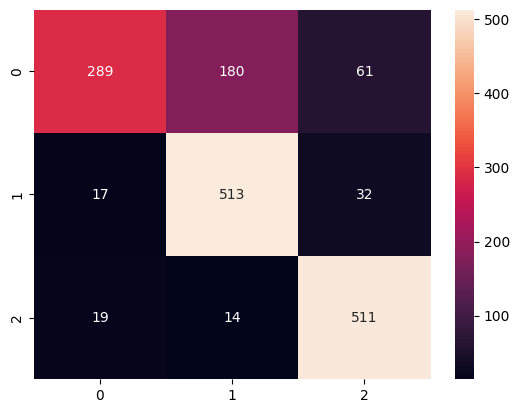

In [32]:
## confusion matrix
from sklearn.metrics import confusion_matrix
confusion_matrix(y_train, y_pred)
sns.heatmap(confusion_matrix(y_train, y_pred), annot=True, fmt="d")
plt.show()

In [33]:
## for the test set
y_pred = clf.predict(X_test)

print("classification_report: ", classification_report(y_test, y_pred))

classification_report:                precision    recall  f1-score   support

           0       0.74      0.42      0.54       152
           1       0.55      0.80      0.66       120
           2       0.71      0.78      0.74       138

    accuracy                           0.65       410
   macro avg       0.67      0.67      0.64       410
weighted avg       0.68      0.65      0.64       410



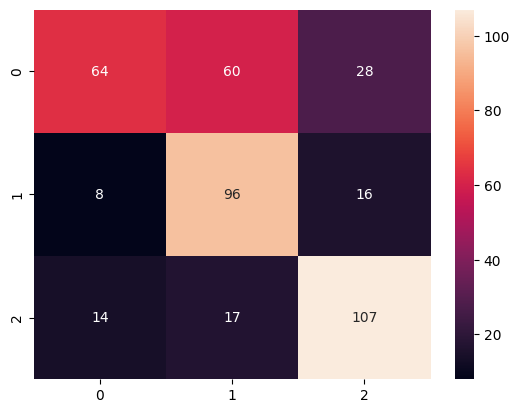

In [34]:
confusion_matrix(y_test, y_pred)
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt="d")
plt.show()

In [35]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)

y_pred = clf.predict(X_train)

print(classification_report(y_train, y_pred))

              precision    recall  f1-score   support

           0       0.98      0.65      0.78       530
           1       0.76      0.99      0.86       562
           2       0.98      0.98      0.98       544

    accuracy                           0.88      1636
   macro avg       0.90      0.88      0.87      1636
weighted avg       0.90      0.88      0.87      1636



<AxesSubplot: >

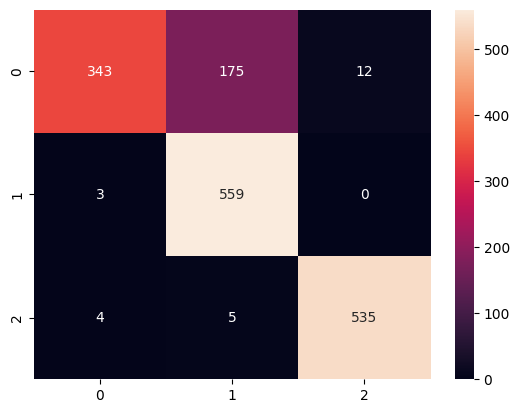

In [36]:
## confusion matrix
from sklearn.metrics import confusion_matrix
confusion_matrix(y_train, y_pred)
sns.heatmap(confusion_matrix(y_train, y_pred), annot=True, fmt="d")

classification_report:                precision    recall  f1-score   support

           0       0.79      0.39      0.52       152
           1       0.51      0.88      0.65       120
           2       0.78      0.73      0.76       138

    accuracy                           0.65       410
   macro avg       0.69      0.67      0.64       410
weighted avg       0.71      0.65      0.64       410



<AxesSubplot: >

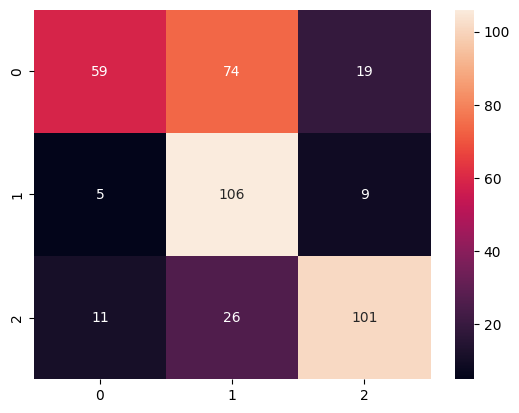

In [37]:
## for the test set
y_pred = clf.predict(X_test)

print("classification_report: ", classification_report(y_test, y_pred))

confusion_matrix(y_test, y_pred)
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt="d")


In [38]:
## regularization
parameters = {'n_estimators': [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000]}
clf = GridSearchCV(RandomForestClassifier(random_state=42), parameters, cv=5, n_jobs=-1)
clf.fit(X_train, y_train)

clf.best_params_

{'n_estimators': 200}

In [39]:
## using the best parameters

clf = RandomForestClassifier(n_estimators=200, random_state=42)
clf.fit(X_train, y_train)

y_pred = clf.predict(X_train)

print(classification_report(y_train, y_pred))

              precision    recall  f1-score   support

           0       0.98      0.65      0.78       530
           1       0.76      0.99      0.86       562
           2       0.98      0.98      0.98       544

    accuracy                           0.88      1636
   macro avg       0.90      0.88      0.87      1636
weighted avg       0.90      0.88      0.87      1636



<AxesSubplot: >

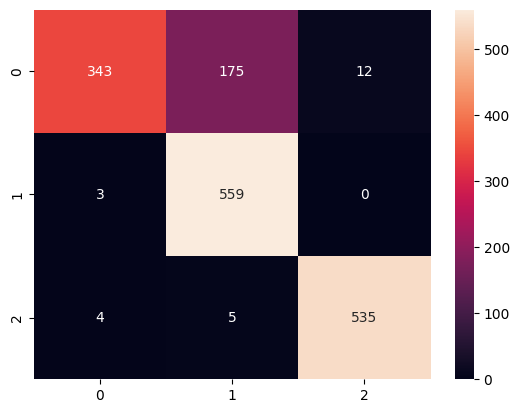

In [40]:
## confusion matrix
from sklearn.metrics import confusion_matrix
confusion_matrix(y_train, y_pred)
sns.heatmap(confusion_matrix(y_train, y_pred), annot=True, fmt="d")

classification_report:                precision    recall  f1-score   support

           0       0.82      0.41      0.54       152
           1       0.53      0.89      0.66       120
           2       0.80      0.76      0.78       138

    accuracy                           0.67       410
   macro avg       0.71      0.69      0.66       410
weighted avg       0.73      0.67      0.66       410



<AxesSubplot: >

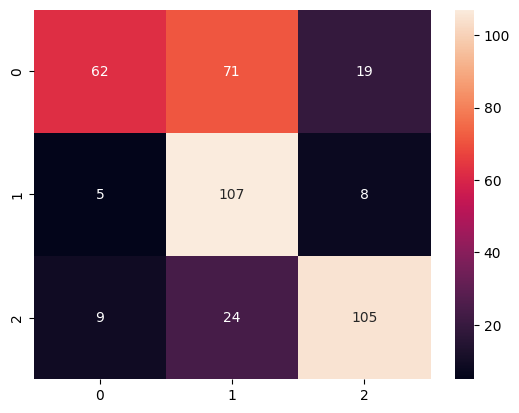

In [41]:
## for the test set
y_pred = clf.predict(X_test)

print("classification_report: ", classification_report(y_test, y_pred))

confusion_matrix(y_test, y_pred)
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt="d")

In [42]:
## n_estimators came out to be the same as what we used before, so we let's use XGBoost as our final model(for now lol)

from xgboost import XGBClassifier
clf = XGBClassifier(n_estimators=200, random_state=42)
clf.fit(X_train, y_train)

y_pred = clf.predict(X_train)

<AxesSubplot: >

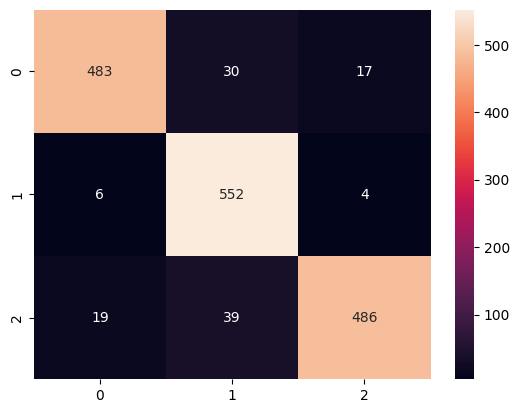

In [43]:

## confusion matrix
confusion_matrix(y_train, y_pred)
sns.heatmap(confusion_matrix(y_train, y_pred), annot=True, fmt="d")

In [44]:
accuracy_score(y_train, y_pred)


0.9297066014669927

In [45]:

print(classification_report(y_train, y_pred))

              precision    recall  f1-score   support

           0       0.95      0.91      0.93       530
           1       0.89      0.98      0.93       562
           2       0.96      0.89      0.92       544

    accuracy                           0.93      1636
   macro avg       0.93      0.93      0.93      1636
weighted avg       0.93      0.93      0.93      1636



In [46]:
## for the test set
y_pred = clf.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.79      0.68      0.73       152
           1       0.66      0.80      0.72       120
           2       0.78      0.75      0.77       138

    accuracy                           0.74       410
   macro avg       0.74      0.75      0.74       410
weighted avg       0.75      0.74      0.74       410



<AxesSubplot: >

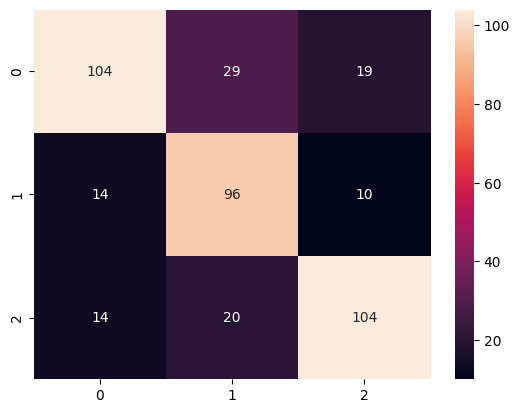

In [47]:
## confusion matrix
confusion_matrix(y_test, y_pred)
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt="d")

In [48]:
## regularization
parameters = {'n_estimators': [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000]}
clf = GridSearchCV(XGBClassifier(random_state=42), parameters, cv=5, n_jobs=-1)
clf.fit(X_train, y_train)

clf.best_params_

{'n_estimators': 300}

In [49]:

from xgboost import XGBClassifier
clf = XGBClassifier(n_estimators=300, random_state=42)
clf.fit(X_train, y_train)

y_pred = clf.predict(X_train)

accuracy_score(y_train, y_pred)

0.9449877750611247

<AxesSubplot: >

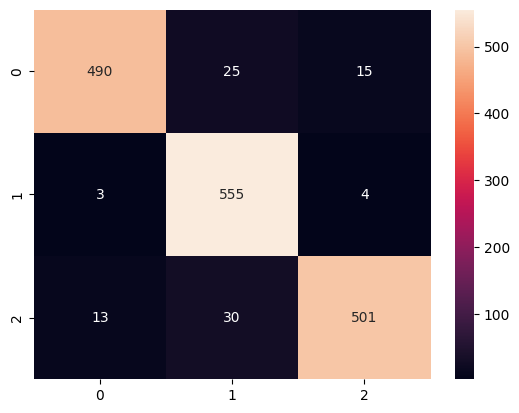

In [50]:
## confusion matrix
confusion_matrix(y_train, y_pred)
sns.heatmap(confusion_matrix(y_train, y_pred), annot=True, fmt="d")

In [51]:
print(classification_report(y_train, y_pred))

              precision    recall  f1-score   support

           0       0.97      0.92      0.95       530
           1       0.91      0.99      0.95       562
           2       0.96      0.92      0.94       544

    accuracy                           0.94      1636
   macro avg       0.95      0.94      0.94      1636
weighted avg       0.95      0.94      0.94      1636



In [52]:
## for the test set
y_pred = clf.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.79      0.66      0.72       152
           1       0.67      0.80      0.73       120
           2       0.77      0.78      0.77       138

    accuracy                           0.74       410
   macro avg       0.74      0.75      0.74       410
weighted avg       0.75      0.74      0.74       410



<AxesSubplot: >

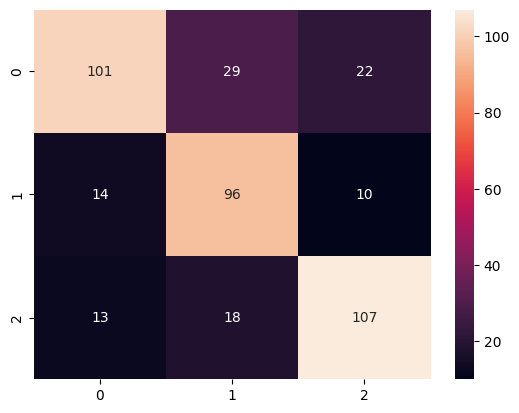

In [53]:
## confusion matrix
confusion_matrix(y_test, y_pred)
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt="d")

In [54]:
## using support vector machine as our model

from sklearn.svm import SVC

clf = SVC(random_state=42)
clf.fit(X_train, y_train)

y_pred = clf.predict(X_train)

accuracy_score(y_train, y_pred)


0.839242053789731

<AxesSubplot: >

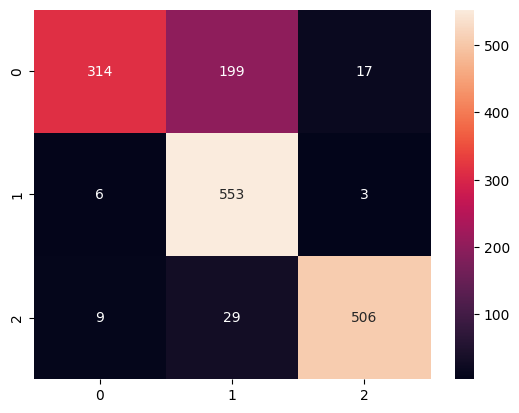

In [55]:
## confusion matrix
confusion_matrix(y_train, y_pred)
sns.heatmap(confusion_matrix(y_train, y_pred), annot=True, fmt="d")

In [56]:
print(classification_report(y_train, y_pred))

              precision    recall  f1-score   support

           0       0.95      0.59      0.73       530
           1       0.71      0.98      0.82       562
           2       0.96      0.93      0.95       544

    accuracy                           0.84      1636
   macro avg       0.87      0.84      0.83      1636
weighted avg       0.87      0.84      0.83      1636



In [60]:
## From all the model we can make a clear observation that our model is getting confused between classes 0 and 1. 
## since we already did SMOTE, we will have to think of other ways to improve our model.

<AxesSubplot: >

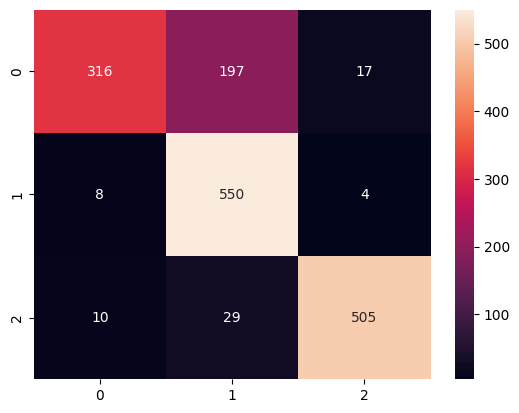

In [58]:
## confusion matrix
confusion_matrix(y_train, y_pred)
sns.heatmap(confusion_matrix(y_train, y_pred), annot=True, fmt="d")

In [100]:
## using a deep learning model

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras.models import Sequential
from tensorflow.keras.callbacks import EarlyStopping

In [101]:
## converting y to one hot encoding

y_train_ohe = tf.keras.utils.to_categorical(y_train, num_classes=3)
y_test_ohe = tf.keras.utils.to_categorical(y_test, num_classes=3)


In [108]:
model = Sequential()
model.add(Dense(128, activation='relu', input_dim= X_train.shape[1]))
model.add(Dropout(0.5))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(32, activation='relu'))
model.add(Dense(3, activation='softmax'))

model.compile(optimizer='adam',
                loss='categorical_crossentropy',
                metrics=['accuracy'])

model.fit(X_train, y_train_ohe, epochs=100, batch_size=32, validation_data=(X_test, y_test_ohe))

Epoch 1/100


/opt/homebrew/lib/python3.10/site-packages/tensorflow/python/framework/indexed_slices.py:444: UserWarning: Converting sparse IndexedSlices(IndexedSlices(indices=Tensor("gradient_tape/sequential_9/dense_27/embedding_lookup_sparse/Reshape_1:0", shape=(None,), dtype=int32), values=Tensor("gradient_tape/sequential_9/dense_27/embedding_lookup_sparse/Reshape:0", shape=(None, 128), dtype=float32), dense_shape=Tensor("gradient_tape/sequential_9/dense_27/embedding_lookup_sparse/Cast:0", shape=(2,), dtype=int32))) to a dense Tensor of unknown shape. This may consume a large amount of memory.
  warnings.warn(


52/52 [==============================] - 0s 3ms/step - loss: 1.0799 - accuracy: 0.4517 - val_loss: 1.0520 - val_accuracy: 0.5293
Epoch 2/100
52/52 [==============================] - 0s 1ms/step - loss: 1.0144 - accuracy: 0.5599 - val_loss: 0.9677 - val_accuracy: 0.5439
Epoch 3/100
52/52 [==============================] - 0s 1ms/step - loss: 0.8768 - accuracy: 0.6284 - val_loss: 0.8681 - val_accuracy: 0.6220
Epoch 4/100
52/52 [==============================] - 0s 1ms/step - loss: 0.6858 - accuracy: 0.7329 - val_loss: 0.8085 - val_accuracy: 0.6317
Epoch 5/100
52/52 [==============================] - 0s 1ms/step - loss: 0.5594 - accuracy: 0.7751 - val_loss: 0.8143 - val_accuracy: 0.6732
Epoch 6/100
52/52 [==============================] - 0s 1ms/step - loss: 0.4555 - accuracy: 0.8246 - val_loss: 0.8085 - val_accuracy: 0.6854
Epoch 7/100
52/52 [==============================] - 0s 1ms/step - loss: 0.4014 - accuracy: 0.8411 - val_loss: 0.8537 - val_accuracy: 0.6878
Epoch 8/100
52/52 [======

In [109]:

## confusion matrix
y_pred = model.predict(X_train)

52/52 [==============================] - 0s 357us/step


In [110]:
## getting the class with the highest probability and storing it in y_pred
y_pred = np.argmax(y_pred, axis=1)

In [111]:
y_pred

array([0, 1, 1, ..., 2, 0, 2])

In [112]:
y_train = np.argmax(y_train_ohe, axis=1)

In [113]:
y_train

array([0, 1, 0, ..., 2, 0, 2])

<AxesSubplot: >

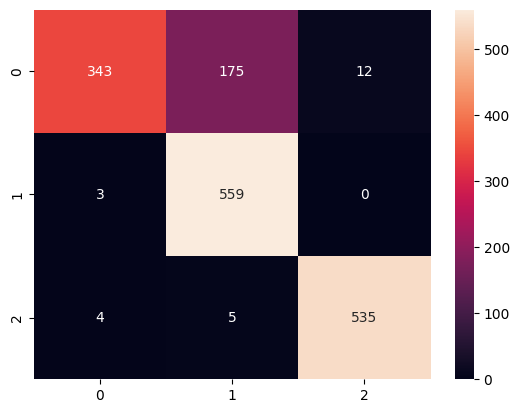

In [114]:
## plotting the confusion matrix
confusion_matrix(y_train, y_pred)
sns.heatmap(confusion_matrix(y_train, y_pred), annot=True, fmt="d")

In [121]:
## hyperparameter tuning( Dont run this code, it will take a lot of time to run)


# from tensorflow.keras.wrappers.scikit_learn import KerasClassifier
# from sklearn.model_selection import GridSearchCV

# def build_classifier(optimizer):
#     classifier = Sequential()
#     classifier.add(Dense(128, activation='relu', input_dim= X_train.shape[1]))
#     classifier.add(Dropout(0.5))
#     classifier.add(Dense(64, activation='relu'))
#     classifier.add(Dropout(0.5))
#     classifier.add(Dense(32, activation='relu'))
#     classifier.add(Dense(3, activation='softmax'))
#     classifier.compile(optimizer=optimizer,
#                 loss='categorical_crossentropy',
#                 metrics=['accuracy'])
#     return classifier

# classifier = KerasClassifier(build_fn = build_classifier)
# parameters = {'batch_size': [25, 32],
#                 'epochs': [100, 500],
#                 'optimizer': ['adam', 'rmsprop']}

# grid_search = GridSearchCV(estimator = classifier,
#                             param_grid = parameters,
#                             scoring = 'accuracy',
#                             cv = 10)

# grid_search = grid_search.fit(X_train, y_train_ohe)

# best_parameters = grid_search.best_params_

In [118]:
best_parameters

{'batch_size': 25, 'epochs': 100, 'optimizer': 'adam'}

In [119]:
## using the best parameters

model = Sequential()
model.add(Dense(128, activation='relu', input_dim= X_train.shape[1]))
model.add(Dropout(0.5))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(32, activation='relu'))
model.add(Dense(3, activation='softmax'))

model.compile(optimizer='adam',
                loss='categorical_crossentropy',
                metrics=['accuracy'])

model.fit(X_train, y_train_ohe, epochs=100, batch_size=25, validation_data=(X_test, y_test_ohe))

Epoch 1/100


/opt/homebrew/lib/python3.10/site-packages/tensorflow/python/framework/indexed_slices.py:444: UserWarning: Converting sparse IndexedSlices(IndexedSlices(indices=Tensor("gradient_tape/sequential_91/dense_355/embedding_lookup_sparse/Reshape_1:0", shape=(None,), dtype=int32), values=Tensor("gradient_tape/sequential_91/dense_355/embedding_lookup_sparse/Reshape:0", shape=(None, 128), dtype=float32), dense_shape=Tensor("gradient_tape/sequential_91/dense_355/embedding_lookup_sparse/Cast:0", shape=(2,), dtype=int32))) to a dense Tensor of unknown shape. This may consume a large amount of memory.
  warnings.warn(


66/66 [==============================] - 0s 2ms/step - loss: 1.0709 - accuracy: 0.5073 - val_loss: 1.0303 - val_accuracy: 0.5317
Epoch 2/100
66/66 [==============================] - 0s 1ms/step - loss: 0.9741 - accuracy: 0.5550 - val_loss: 0.9154 - val_accuracy: 0.5463
Epoch 3/100
66/66 [==============================] - 0s 1ms/step - loss: 0.8052 - accuracy: 0.6210 - val_loss: 0.8525 - val_accuracy: 0.5707
Epoch 4/100
66/66 [==============================] - 0s 1ms/step - loss: 0.6690 - accuracy: 0.7060 - val_loss: 0.8044 - val_accuracy: 0.6439
Epoch 5/100
66/66 [==============================] - 0s 1ms/step - loss: 0.5574 - accuracy: 0.7842 - val_loss: 0.8263 - val_accuracy: 0.6512
Epoch 6/100
66/66 [==============================] - 0s 1ms/step - loss: 0.4583 - accuracy: 0.8007 - val_loss: 0.8515 - val_accuracy: 0.6659
Epoch 7/100
66/66 [==============================] - 0s 1ms/step - loss: 0.4144 - accuracy: 0.8258 - val_loss: 0.8817 - val_accuracy: 0.6829
Epoch 8/100
66/66 [======

52/52 [==============================] - 0s 382us/step


<AxesSubplot: >

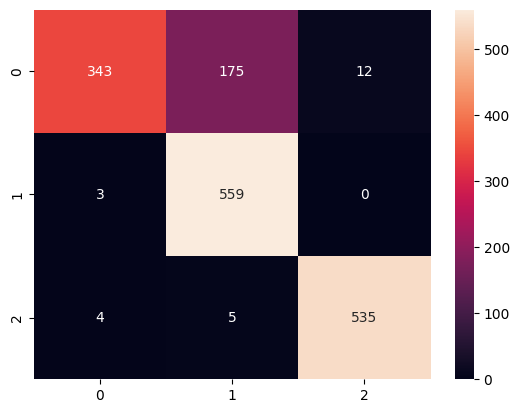

In [120]:
## confusion matrix
y_pred = model.predict(X_train)

## getting the class with the highest probability and storing it in y_pred
y_pred = np.argmax(y_pred, axis=1)
y_train = np.argmax(y_train_ohe, axis=1)

## plotting the confusion matrix
confusion_matrix(y_train, y_pred)
sns.heatmap(confusion_matrix(y_train, y_pred), annot=True, fmt="d")


In [122]:
## it did no good either. We will have to think of other ways to improve our model.

In [131]:
from xgboost import XGBClassifier
clf = XGBClassifier(n_estimators=200, random_state=42)
clf.fit(X_train, y_train)

## y_pred = clf.predict(X_train)

## using k-folds cross validation on XGBoost model to remove overfitting

from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = clf, X = X_train, y = y_train, cv = 10)
print("Accuracy: {:.2f} %".format(accuracies.mean()*100))

Accuracy: 75.43 %


<AxesSubplot: >

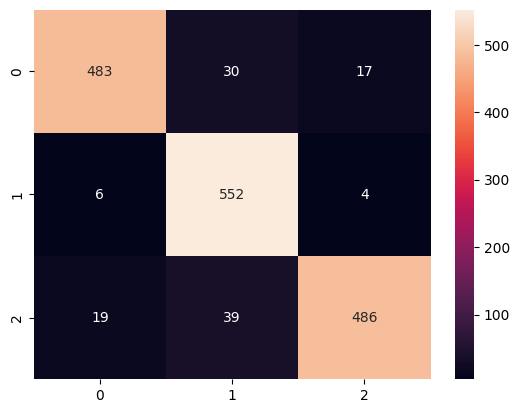

In [132]:
## confusion matrix
y_pred = clf.predict(X_train)

## plotting the confusion matrix
confusion_matrix(y_train, y_pred)
sns.heatmap(confusion_matrix(y_train, y_pred), annot=True, fmt="d")

<AxesSubplot: >

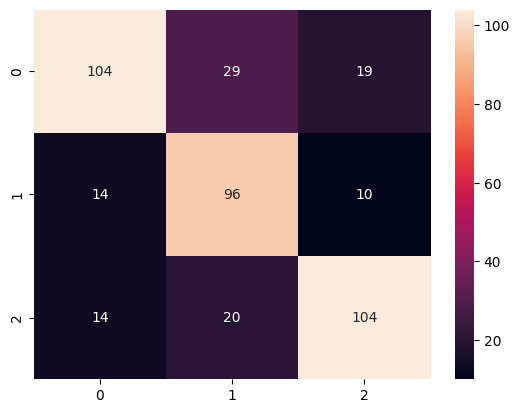

In [133]:
## on test data

y_pred = clf.predict(X_test)

## plotting the confusion matrix
confusion_matrix(y_test, y_pred)
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt="d")

In [134]:
## this is somewhat the best result that we got on the dataset.

## saving the model

import pickle
pickle.dump(clf, open('sentTosentiment.pkl','wb'))

In [167]:
## function to predict the sentiment of a sentence
def predict_sentiment(sentence):
    y_pred = model.predict(sentence)
    if y_pred == 0:
        return 'Negative'
    elif y_pred == 1:
        return 'Neutral'
    elif y_pred == 2:
        return 'Positive'

In [ ]:
## defining functions to predict the sentiment of a sentence
model = pickle.load(open('sentTosentiment.pkl','rb'))
vectorizer = pickle.load(open('vectorizer.pkl','rb'))

def tokenize(sentence):
    tokens = nlp(sentence)
    tokens = [token.text for token in tokens]
    tokens = [token for token in tokens if token.isalpha() or token.isnumeric()]
    tokens = [token for token in tokens if token not in STOP_WORDS]
    return tokens

In [213]:
def vectorize(sentence):
    vector = vectorizer.transform([sentence])
    return vector

a = vectorize('I am okay with the movie although I loved the ending')
b = vectorize('I am not okay with the movie and I hated the ending')

In [212]:

def predict_sentiment(sentence):
    y_pred = model.predict(sentence)
    if y_pred == 0:
        return 'Negative'
    elif y_pred == 1:
        return 'Neutral'
    elif y_pred == 2:
        return 'Positive'

predict_sentiment(a)

'Positive'

In [214]:
predict_sentiment(b)

'Positive'

In [215]:
## LOL

## balanced weights for the classes
## Stratified sampling
## oversampling under class and undersampling over class
## K folds cross validation
## table of train and test accuracy with kfolds
## accuracy, ## precision, ## recall, ## f1 score, ## confusion matrix